# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
**Submitted by**-  Pratik Thorat

# **Problem Statement**


<b>Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

### Import Libraries

In [1]:
# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math

#For handling date column
from datetime import datetime

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import plotly.express as x




#For feature selection
from sklearn import feature_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor





%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading data
day_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike sharing ineuron/day.csv")
hour_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bike sharing ineuron/hour.csv")


### Dataset First View

In [4]:
# Dataset First Look
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#Creating dictionary
data_dict={'Hour':hour_df,'Day':day_df}

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
for key,value in data_dict.items():
  print(f'{key} dataframe shape : {value.shape}')

Hour dataframe shape : (17379, 17)
Day dataframe shape : (731, 16)


### Dataset Information

In [8]:
# Dataset Info
for key,value in data_dict.items():
  print(f'--------{key} dataframe info--------\n')
  print(f'dataframe shape : {value.info()}\n')

--------Hour dataframe info--------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
dataframe sh

<b> So there are no missing values in the dataset

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
for key,value in data_dict.items():
  print(f'--------{key} dataframe duplicates--------\n')
  print(f'{value[value.duplicated()].count()}\n')


--------Hour dataframe duplicates--------

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

--------Day dataframe duplicates--------

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



<b>There are no duplicate values in the dataset

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
for key,value in data_dict.items():
  print(f'--------{key} dataframe Missing/Null Value--------\n')
  print(f'{value[value.isna()].count()}\n')



--------Hour dataframe Missing/Null Value--------

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

--------Day dataframe Missing/Null Value--------

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



<b>No missing values in the dataset.

### What did you know about your dataset?

**Day Dataset**
1. Dataset contains 731 rows & 16 columns.
2.All the columns have numerical variable
3.`holiday`, `weekday`,`workingday`, `weathersit` contains categorical values.
4.`cnt` column is our target variable
**Hour Dataset**
1. Dataset contains 17379 rows & 17 columns.
2.All the columns have numerical variable
3.`holiday`, `weekday`,`workingday`, `weathersit` contains categorical values.
4.`cnt` column is our target variable


* Dataset has no Null/Duplicate values and missing values in the dataset.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
for key,value in data_dict.items():
  print(f'--------{key} dataframe columns--------\n')
  print(f'{value.columns}\n')

--------Hour dataframe columns--------

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

--------Day dataframe columns--------

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')



In [12]:
# Dataset Describe
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Variables Description


* **datetime** - hourly date + timestamp
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** -
      `1: Clear, Few clouds, Partly cloudy, Partly cloudy.
       2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
       3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
       4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
# and printing those columns which have less than 25 values
for i in hour_df.columns:
  print(f"Unique {i}'s count:{hour_df[i].nunique()}")
  if i in hour_df.columns:
    if(hour_df[i].nunique() < 25):
      print(f"{hour_df[i].unique()}\n")

Unique instant's count:17379
Unique dteday's count:731
Unique season's count:4
[1 2 3 4]

Unique yr's count:2
[0 1]

Unique mnth's count:12
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique hr's count:24
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Unique holiday's count:2
[0 1]

Unique weekday's count:7
[6 0 1 2 3 4 5]

Unique workingday's count:2
[0 1]

Unique weathersit's count:4
[1 2 3 4]

Unique temp's count:50
Unique atemp's count:65
Unique hum's count:89
Unique windspeed's count:30
Unique casual's count:322
Unique registered's count:776
Unique cnt's count:869


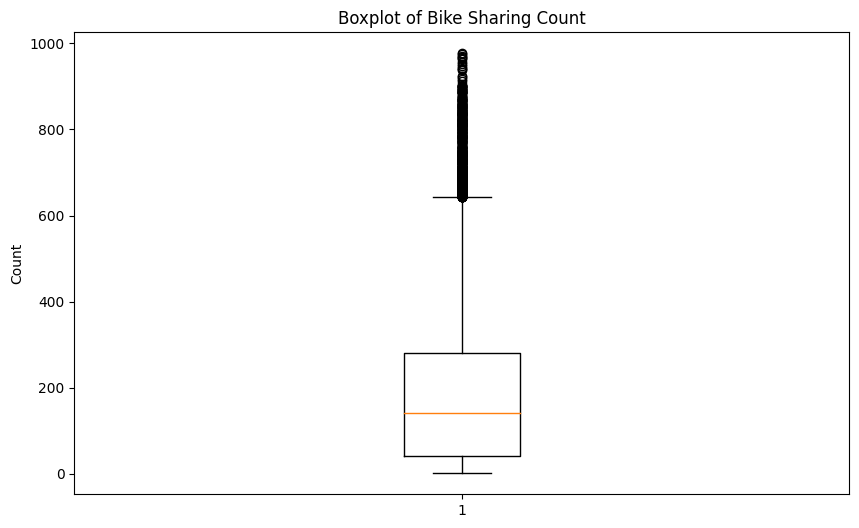

Outliers:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
10383    10384  2012-03-13       1   1     3  18        0        2   
10406    10407  2012-03-14       1   1     3  17        0        3   
10407    10408  2012-03-14       1   1     3  18        0        3   
10431    10432  2012-03-15       1   1     3  18        0        4   
10527    10528  2012-03-19       1   1     3  18        0        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15828    15829  2012-10-26       4   1    10  17        0        5   
15848    15849  2012-10-27       4   1    10  13        0        6   
15849    15850  2012-10-27       4   1    10  14        0        6   
16726    16727  2012-12-04       4   1    12  17        0        2   
16741    16742  2012-12-05       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10383           1           1  0.70  0.6364  0.34     0.2985      96   
10406

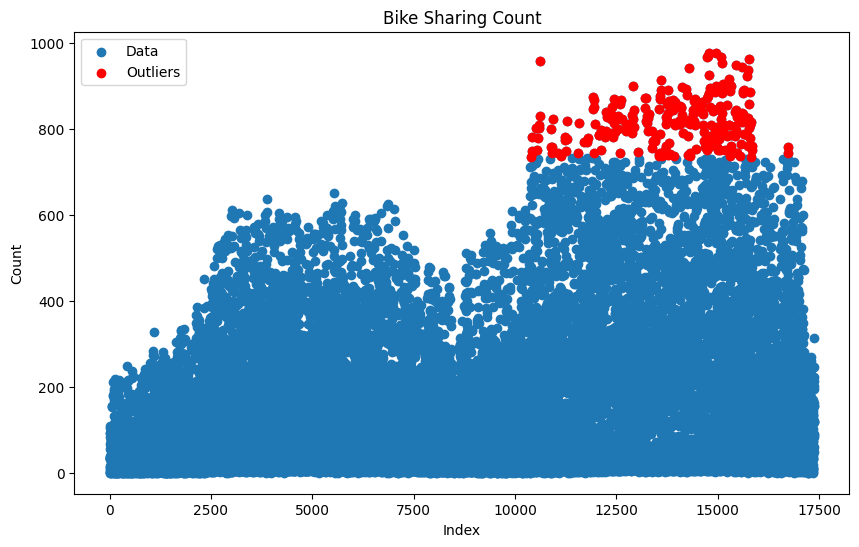

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check for outliers in the "count" variable
plt.figure(figsize=(10, 6))
plt.boxplot(hour_df['cnt'])
plt.title('Boxplot of Bike Sharing Count')
plt.ylabel('Count')
plt.show()

# Calculate the z-scores for each data point in the "count" variable
z_scores = (hour_df['cnt'] - hour_df['cnt'].mean()) / hour_df['cnt'].std()

# Identify outliers based on a threshold (e.g., z-score > 3)
outliers = hour_df[z_scores > 3]

# Print the outliers
print("Outliers:")
print(outliers)

# Visualize the outliers
plt.figure(figsize=(10, 6))
plt.scatter(hour_df.index, hour_df['cnt'], label='Data')
plt.scatter(outliers.index, outliers['cnt'], color='red', label='Outliers')
plt.title('Bike Sharing Count')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()


#<b>Handling outliers

In this dataset, our objective is to predict optimum bike-sharing demand during each hour to maintain a stable supply of bikes to the customers. So I have decided to keep these outliers for correctly predicting bike sharing demand during these exceptional circumstances. Else I would have used an interquartile range to filter the outliers.

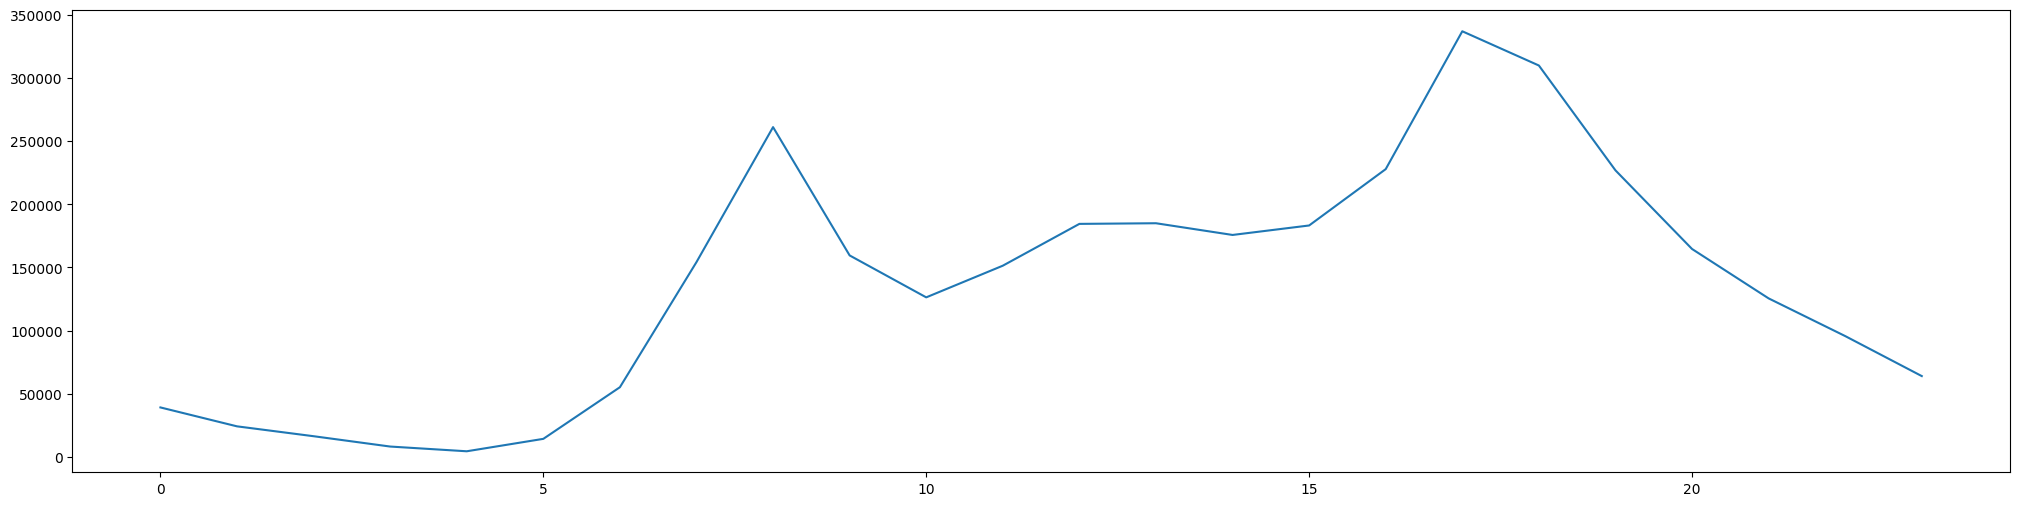

In [24]:
#lineplot of datewise bike sharing demand
count_date=hour_df.groupby(['hr'])['cnt'].sum().reset_index()
fig = plt.figure(figsize=(25,6))
ax = plt.axes()
x = count_date['hr']
ax.plot(x, count_date['cnt'])
plt.show()

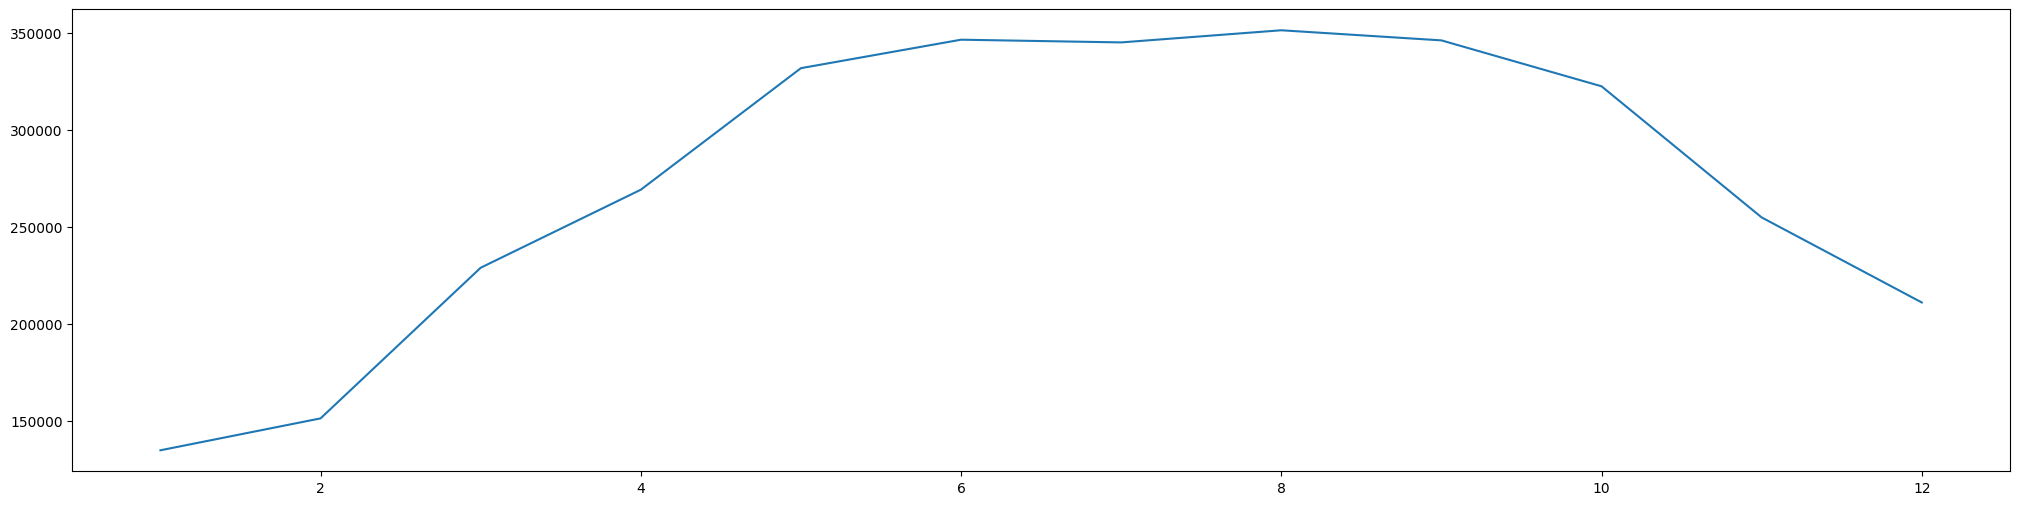

In [26]:
# Lineplot of monthly bike sharing demand
count_date=hour_df.groupby(['mnth'])['cnt'].sum().reset_index()
fig = plt.figure(figsize=(25,6))
ax = plt.axes()
x = count_date['mnth']
ax.plot(x, count_date['cnt'])
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [27]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month',
                        'cnt':'total_count','hr':'hour','yr':'year'},inplace=True)
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Type casting the datetime and categorical attributes

In [28]:
hour_df['datetime']=pd.to_datetime(hour_df.datetime)

hour_df['season']=hour_df.season.astype('category')
hour_df['year']=hour_df.year.astype('category')
hour_df['month']=hour_df.month.astype('category')
hour_df['hour']=hour_df.hour.astype('category')
hour_df['is_holiday']=hour_df.is_holiday.astype('category')
hour_df['weekday']=hour_df.weekday.astype('category')
hour_df['is_workingday']=hour_df.is_workingday.astype('category')
hour_df['weather_condition']=hour_df.weather_condition.astype('category')

In [29]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#<b> Time Frame

###<b>Seasonwise Hourly distribution of bikes

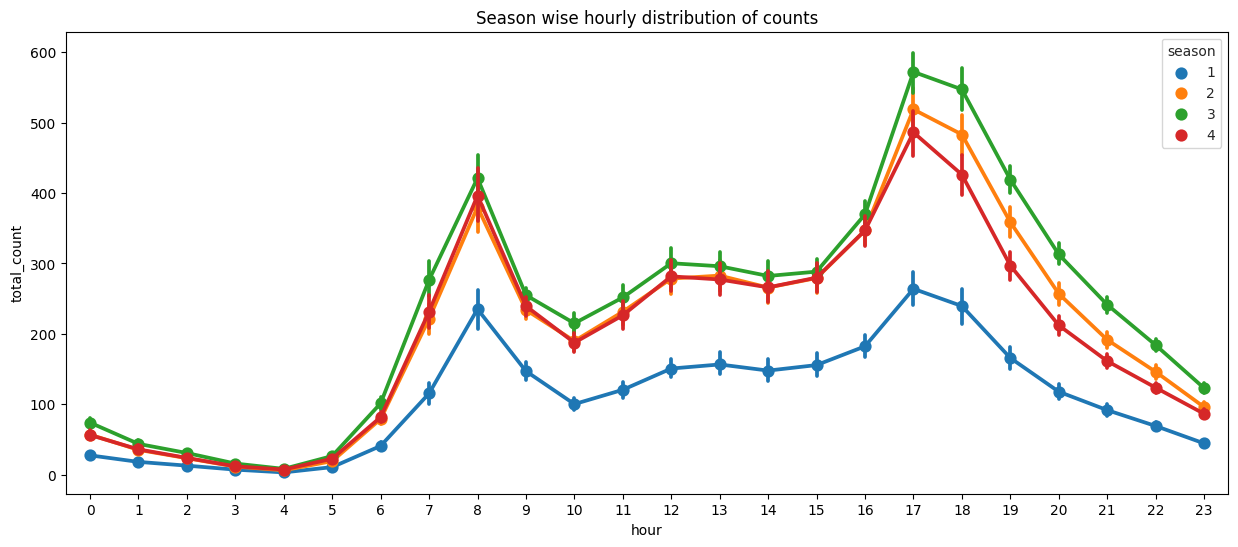

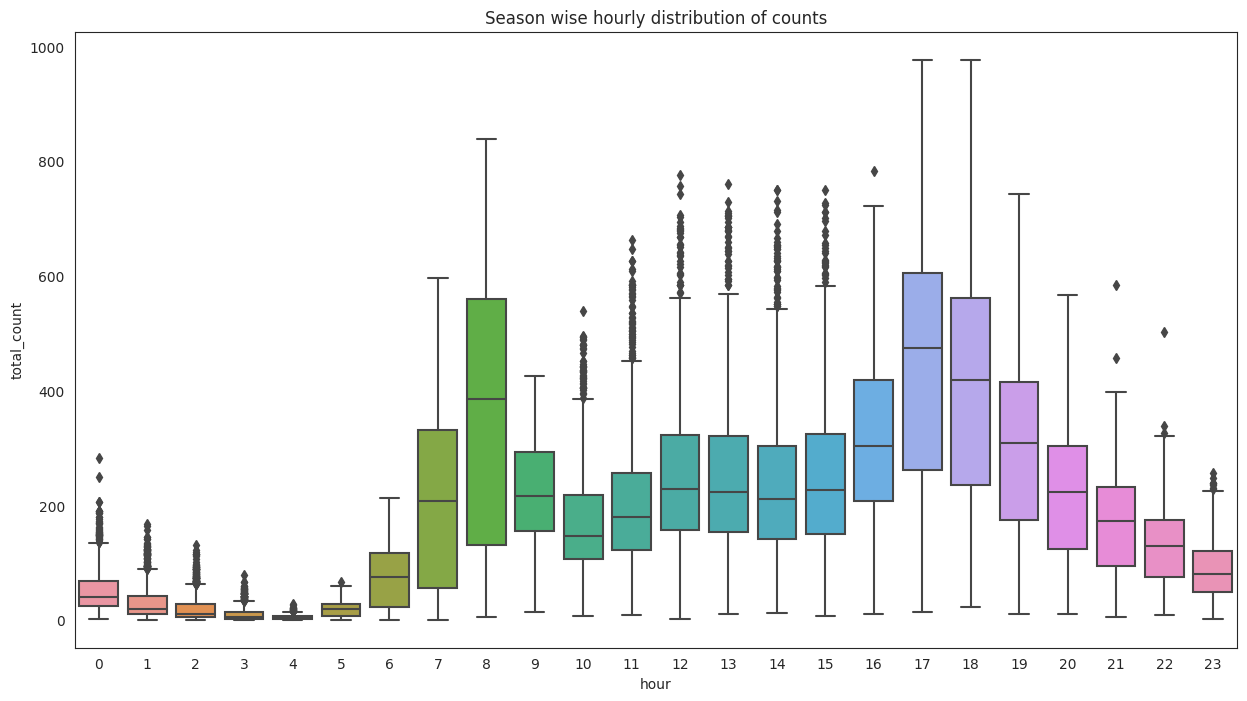

In [30]:
fig,ax=plt.subplots(figsize=(15,6))
sns.set_style('white')

sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','season']],hue='season',ax=ax)
ax.set_title('Season wise hourly distribution of counts')
plt.show()
fig,ax1=plt.subplots(figsize=(15,8))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count']],ax=ax1)
ax1.set_title('Season wise hourly distribution of counts')
plt.show()

###<b>Weekdaywise hourly distribution of count.

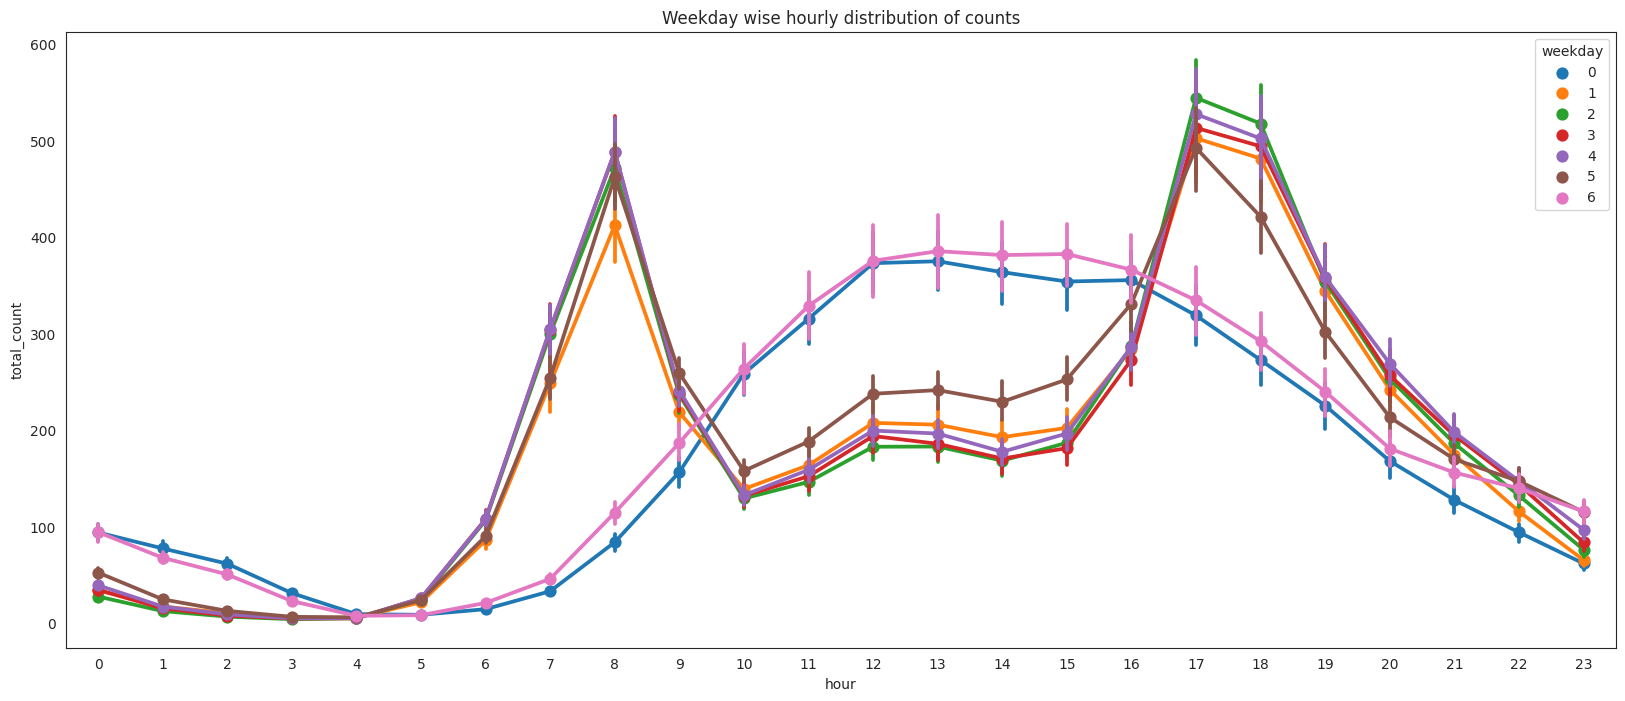

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','weekday']],hue='weekday')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

###<b> Monthly distribution of counts.

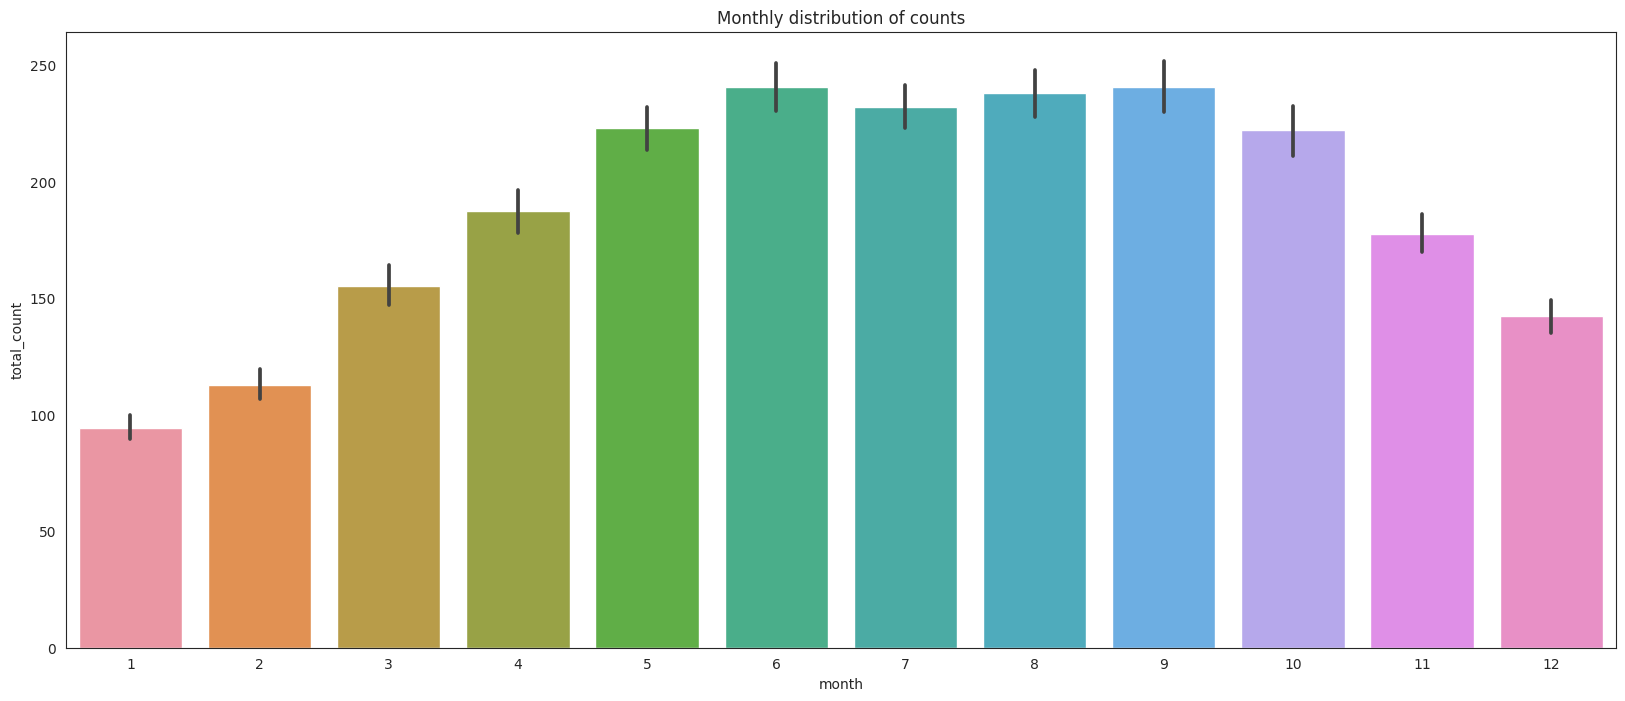

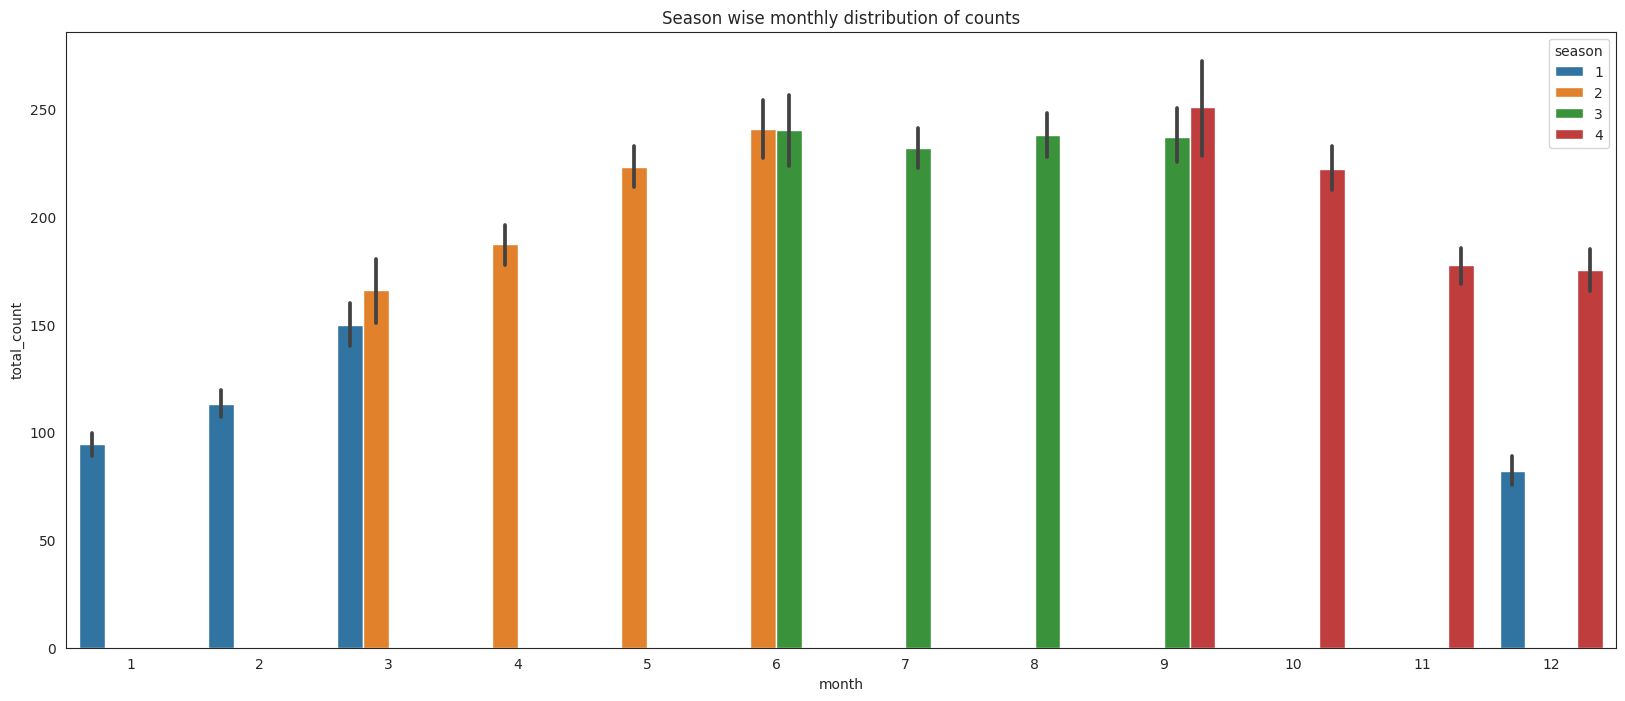

In [32]:
fig,ax1=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count']],ax=ax1)
ax1.set_title('Monthly distribution of counts')
plt.show()
fig,ax2=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count','season']],hue='season',ax=ax2)
ax2.set_title('Season wise monthly distribution of counts')
plt.show()

###<b> Yearwise Distribution of counts.

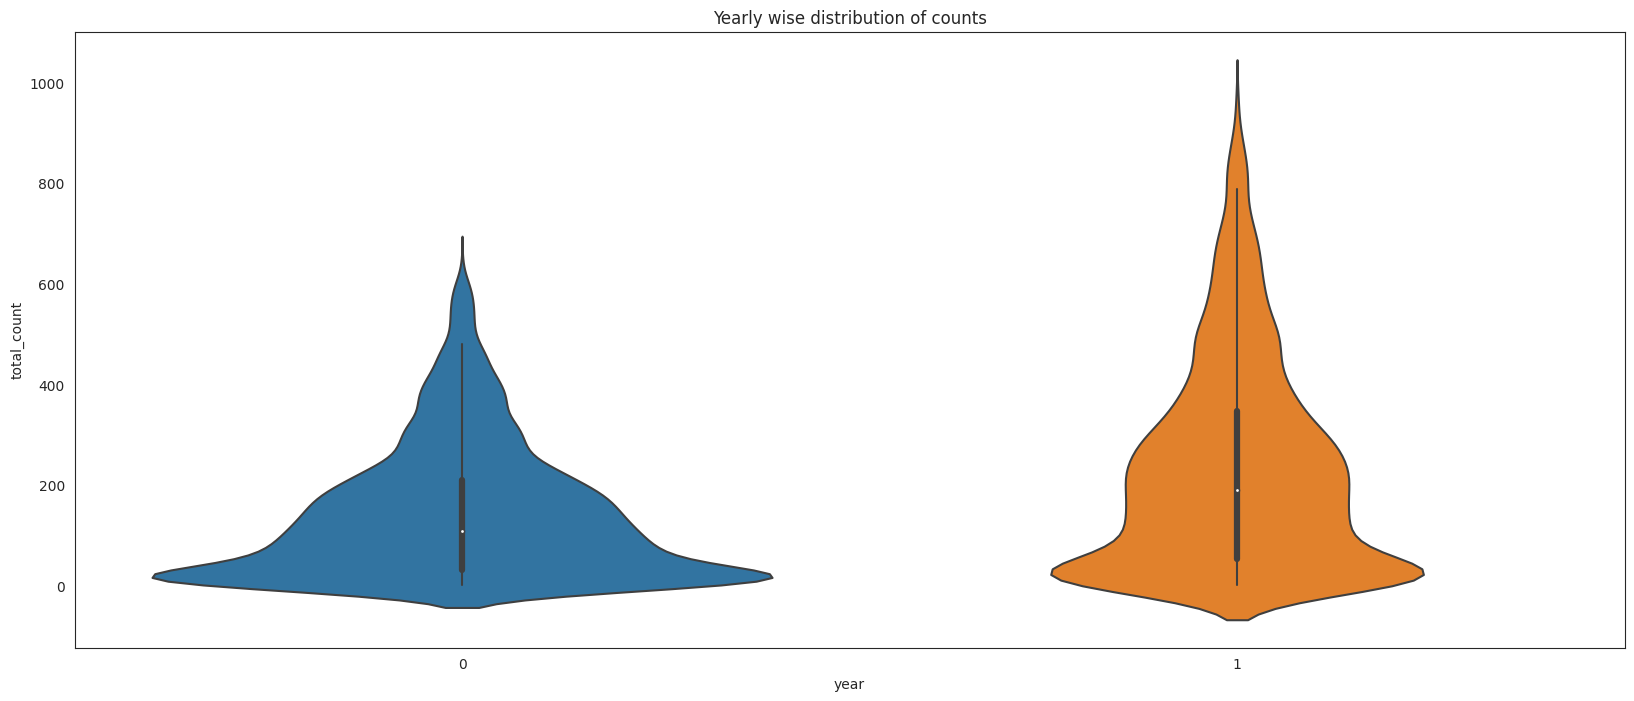

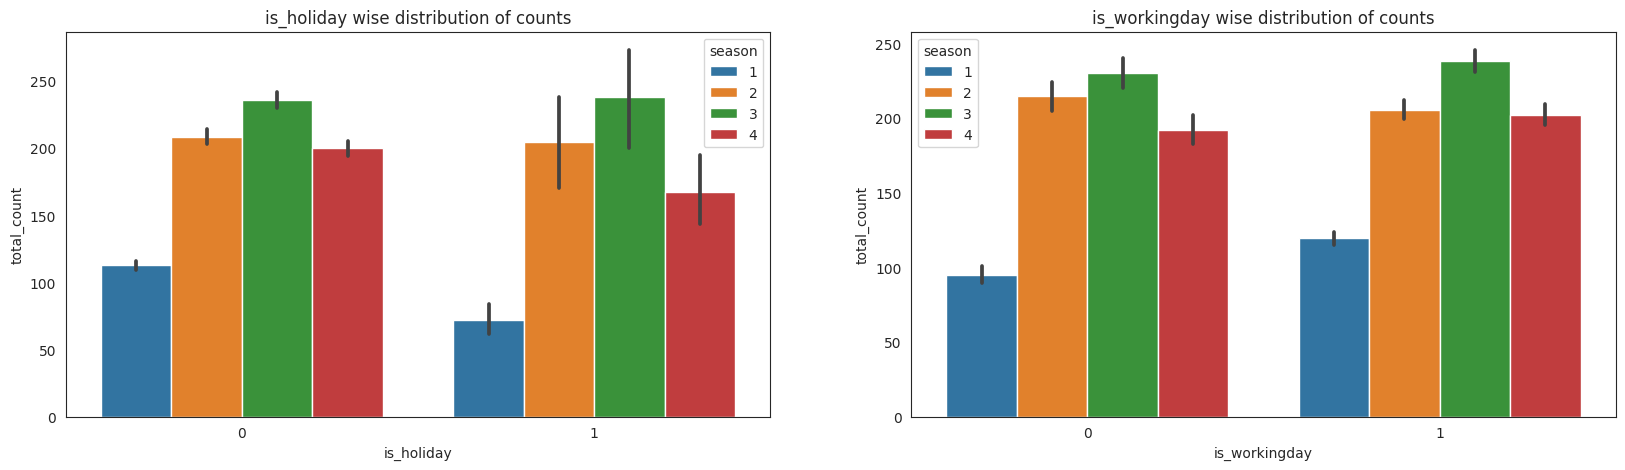

In [33]:
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count']])
ax.set_title('Yearly wise distribution of counts')
plt.show()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
ax1.set_title('is_holiday wise distribution of counts')
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)
ax2.set_title('is_workingday wise distribution of counts')
plt.show()

###<b> Heatmap

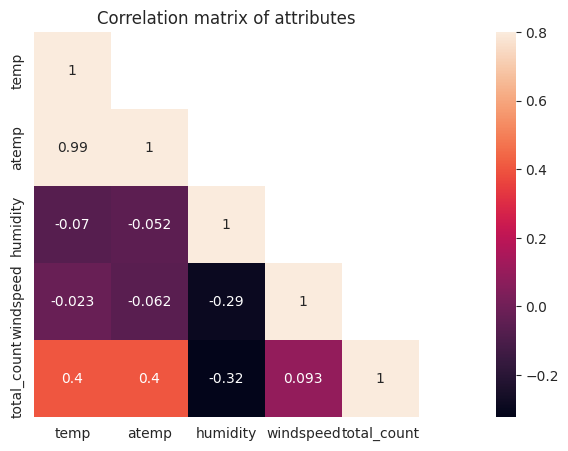

In [34]:
correMtr=hour_df[["temp","atemp","humidity","windspeed","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

#<b>Impact of Holidays

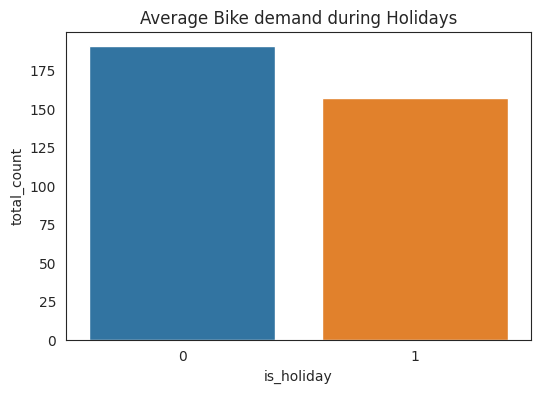

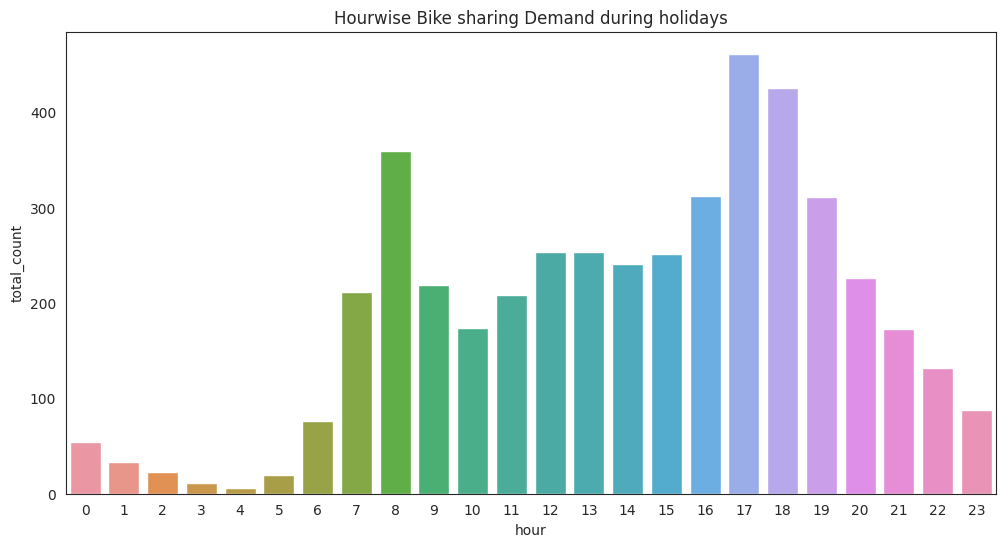

In [37]:
# Chart - 9 visualization code
import plotly.express as x
#Barplot of holiday vs rented bike count
y=hour_df.groupby('is_holiday')['total_count'].mean().reset_index()
fig = plt.subplots(figsize=(6, 4))
sns.barplot(x ='is_holiday',
            y ='total_count',
            data = y).set_title('Average Bike demand during Holidays')
plt.show()

#For plotting hourwise demand during holidays
c=hour_df.groupby('hour')['total_count'].mean().reset_index()

fig = plt.subplots(figsize=(12, 6))
sns.barplot(x ='hour',
            y ='total_count',
            data = c).set_title('Hourwise Bike sharing Demand during holidays')
plt.show()

#Pie plot showing percentage of demand per hour during holidays
fig = x.pie(c, values='total_count', names=c['hour'].unique(),title='Percentage of Hourwise Bike sharing Demand during holidays')
fig.update_layout(autosize=False,width=600,height=400,legend_title_text = "Hour of the day")
fig.update_layout(autosize=True,width=750,height=600)


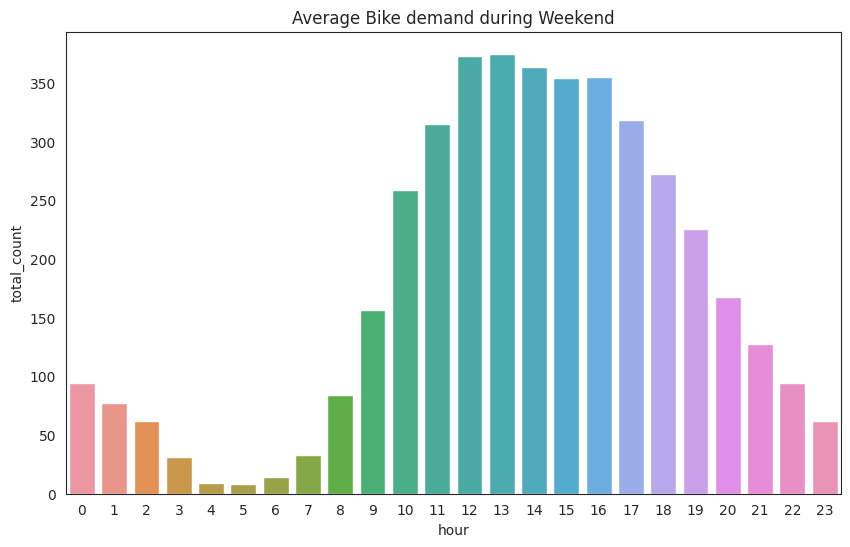

In [38]:

y=hour_df.groupby(['weekday','hour'])['total_count'].mean().reset_index()

#Bar plot to show hourwise demand during weekend
y=y[y['weekday']==0]
fig = plt.subplots(figsize=(10, 6))
sns.barplot(x ='hour',
            y ='total_count',
            data = y).set_title('Average Bike demand during Weekend')
plt.show()

#Pie plot showing percentage of demand per hour during weekend
fig = x.pie(y, values='total_count', names=y['hour'].unique(),title='Percentage of average hourwise Bike demand during Weekend')
fig.update_layout(autosize=False,width=600,height=400,legend_title_text = "Hour of the day")
fig.update_layout(autosize=True,width=750,height=600)